# E4 - Seaborn

### What are the most popular stations in the city? 
### What are the busiest months and is there a weather component at play?
### What are the most popular trips between stations? 
### Are the existing stations evenly distributed?


The first question - “What are the most popular stations in the city?” - has an easy answer - we simply need a list of the 10 or 20 most popular start stations in the city. As this variable is a categorical one, a **bar chart** would suit our purposes best. A bar chart is one of the most common forms of visualizations because it’s very straightforward to interpret from anyone regardless of their background. 

Onto the second question - regarding when the most trips are taken and how this is connected to weather - we’d need a yearly overview of the trips month by month. Time series are best plotted on a **line chart**, hence we could plot the sum of the bike trips for each month as one line and combine it with the average temperature monthly as a second line on the plot. This will also show us whether there’s a relationship between temperature and bike usage. This is important because right now, the business strategy development isn’t clear whether the demand problem is a seasonal one or not. 


In [1]:
# Import Required Libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
import numpy as np

In [3]:
print(np.__version__)

1.26.4


In [4]:
# Load the Chicago dataset and set the first column as the index

df = pd.read_csv('chicago_data.csv', index_col = 0)

In [5]:
# Display the data type of each column in the dataframe

df.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
date                  object
avgTemp              float64
_merge                object
dtype: object

<Axes: >

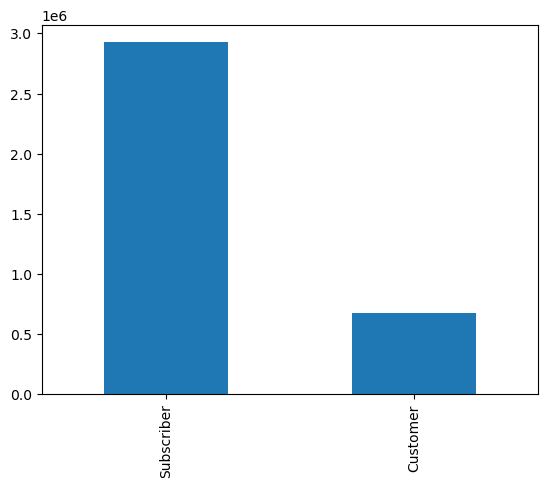

In [6]:
# Plot a bar chart showing the frequency of each user type

df['usertype'].value_counts().plot(kind = 'bar')

In [7]:
# Plot a bar chart of raw usertype values (each row counted once) - Wrong command for Seaborn (Always requires explicit counting before plotting)

df['usertype'].plot(kind = 'bar')

TypeError: no numeric data to plot

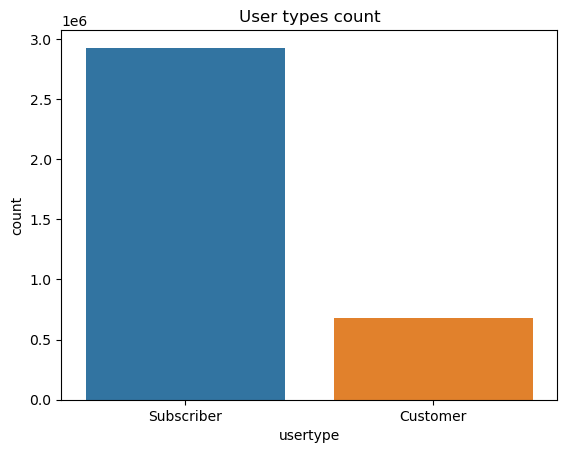

In [8]:
# Use seaborn to plot the count of each user type

sns.countplot(data = df, x = 'usertype')
plt.title("User types count")
plt.show()

### Types of plots

In [9]:
# Display all column names in the dataframe

df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'date', 'avgTemp',
       '_merge'],
      dtype='object')

In [10]:
# Preview the first few values in the birthyear column

df['birthyear'].head()

0    1988.0
1    1984.0
2    1989.0
3    1983.0
4    1989.0
Name: birthyear, dtype: float64

In [11]:
# Count missing values in each column of the dataframe

df.isnull().sum()

trip_id                   0
start_time                0
end_time                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender               562505
birthyear            555209
date                      0
avgTemp                   0
_merge                    0
dtype: int64

In [12]:
# Replace missing birthyear values with the median

df['birthyear'].fillna(df['birthyear'].median(), inplace = True)

In [13]:
# Recheck for any remaining missing values

df.isnull().sum()

trip_id                   0
start_time                0
end_time                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender               562505
birthyear                 0
date                      0
avgTemp                   0
_merge                    0
dtype: int64

In [14]:
# Convert birthyear column to integer type and store it as birth_year

df['birth_year'] = df['birthyear'].astype('int')

In [15]:
# Display the birth_year column

df['birth_year']

0          1988
1          1984
2          1989
3          1983
4          1989
           ... 
3603077    1983
3603078    1990
3603079    1995
3603080    1999
3603081    1990
Name: birth_year, Length: 3603082, dtype: int64

In [16]:
# Convert the birth_year column into datetime format using only the year

df['birth_year_2'] =  pd.to_datetime(df['birth_year'], format = "%Y")

In [17]:
# Display the converted datetime column for birth years

df['birth_year_2']

0         1988-01-01
1         1984-01-01
2         1989-01-01
3         1983-01-01
4         1989-01-01
             ...    
3603077   1983-01-01
3603078   1990-01-01
3603079   1995-01-01
3603080   1999-01-01
3603081   1990-01-01
Name: birth_year_2, Length: 3603082, dtype: datetime64[ns]

In [18]:
# Define a function that calculates age by subtracting birth year from the current year

def calculate_age(birthyear):
    today = dt.today()
    return today.year - birthyear.dt.year

In [19]:
# Calculate age for each rider using the birth_year_2 column

df['age'] = calculate_age(df['birth_year_2'])

In [20]:
# Preview the first few calculated age values

df['age'].head()

0    37
1    41
2    36
3    42
4    36
Name: age, dtype: int64

## Types of seaborn visualizations

#### Bar chart

In [21]:
# Add a helper column where each row is counted as 1

df['value'] = 1

In [22]:
# Count how many trips started at each station and return as a dataframe

df_t = df.groupby('from_station_name')['value'].count().reset_index()

In [23]:
# Display the trip counts grouped by starting station

df_t

,from_station_name,value
0,2112 W Peterson Ave,456
1,63rd St Beach,956
2,900 W Harrison St,6187
3,Aberdeen St & Jackson Blvd,12056
4,Aberdeen St & Monroe St,9875
...,...,...
617,Wood St & Taylor St,5987
618,Woodlawn Ave & 55th St,3488
619,Woodlawn Ave & 75th St,30
620,Woodlawn Ave & Lake Park Ave,1010


In [24]:
# Select the 20 stations with the highest trip counts

top20 = df_t.nlargest(20, 'value')

In [25]:
# Display the top 20 most popular starting stations

top20

,from_station_name,value
547,Streeter Dr & Grand Ave,66944
83,Canal St & Adams St,62654
146,Clinton St & Madison St,51692
150,Clinton St & Washington Blvd,48669
399,Michigan Ave & Washington St,38029
326,Lake Shore Dr & Monroe St,36174
152,Columbus Dr & Randolph St,35342
310,Kingsbury St & Kinzie St,34589
86,Canal St & Madison St,34188
169,Daley Center Plaza,33968


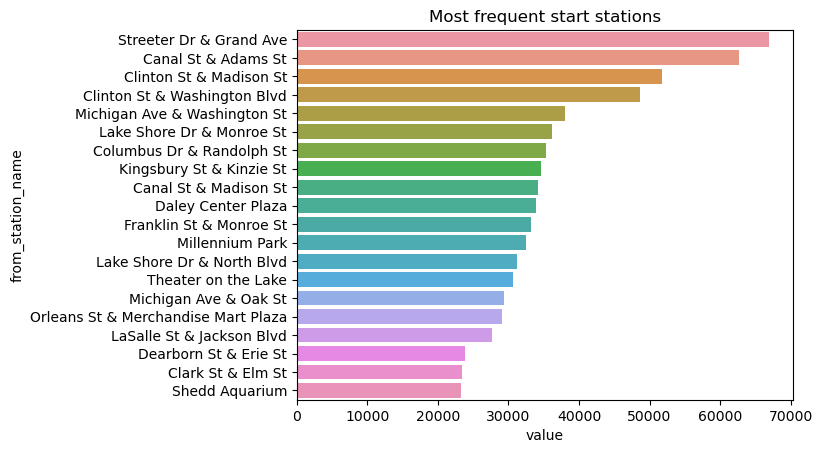

In [26]:
# Plot the top 20 start stations with the highest trip counts

sns.barplot(data = top20, x = 'value', y = 'from_station_name')
plt.title("Most frequent start stations")
plt.show()

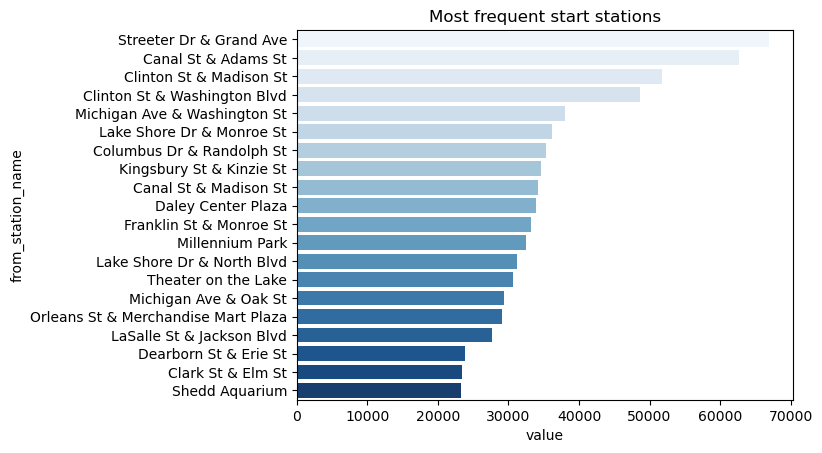

In [27]:
# Plot the top 20 start stations using a reversed blue color palette

sns.barplot(data = top20, x = 'value', y = 'from_station_name', palette=("Blues")) 
plt.title("Most frequent start stations")
plt.show()

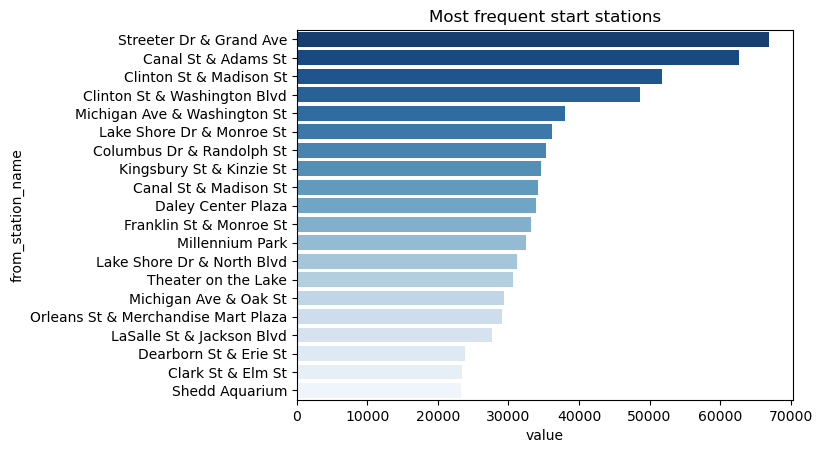

In [28]:
# Plot the top 20 start stations using the Blues_r color palette

sns.barplot(data = top20, x = 'value', y = 'from_station_name', palette=("Blues_r"))
plt.title("Most frequent start stations")
plt.show()

### Line plot 

In [29]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['trip_id'].count()).reset_index()

In [30]:
# Preview the first few rows of the grouped dataframe

df_group.head()

,date,trip_id
0,2018-01-01,376
1,2018-01-02,1637
2,2018-01-03,2493
3,2018-01-04,2416
4,2018-01-05,2228


In [31]:
# Rename column, merge daily ride counts, inspect merge results, and set date as index

df_group.rename(columns = {'trip_id':'bike_rides_daily'}, inplace = True) # Rename trip_id column to bike_rides_daily for clarity
df = df.merge(df_group, on = "date", how = 'outer', indicator = 'merge_flag') # Merge daily ride counts into the main dataframe and track merge status
print(df['merge_flag'].value_counts(dropna = False)) # Check how many rows matched, unmatched, or came from each side of the merge
print("Shape of January 1st is", df[df['date'] == '2018-01-01'].shape) # Verify how many rows exist for January 1st in the merged dataset 
print("Shape of January 2nd is", df[df['date'] == '2018-01-02'].shape) # Verify how many rows exist for January 2nd in the merged dataset

df_temp = df.set_index('date') # Set the date column as the dataframe index

print(df_temp.columns) # Display the column names after setting date as index

both          3603082
left_only           0
right_only          0
Name: merge_flag, dtype: int64
Shape of January 1st is (376, 21)
Shape of January 2nd is (1637, 21)
Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'avgTemp',
       '_merge', 'birth_year', 'birth_year_2', 'age', 'value',
       'bike_rides_daily', 'merge_flag'],
      dtype='object')


In [32]:
# Display all column names in the dataframe with date as index

df_temp.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'avgTemp',
       '_merge', 'birth_year', 'birth_year_2', 'age', 'value',
       'bike_rides_daily', 'merge_flag'],
      dtype='object')

In [33]:
# Convert the date column to datetime using the specified format

df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [34]:
# Preview the first few rows of the dataframe after indexing

df_temp.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,avgTemp,_merge,birth_year,birth_year_2,age,value,bike_rides_daily,merge_flag
date,,,,,,,,,,,,,,,,,,,,
2018-01-01,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,-18.9,both,1988,1988-01-01,37,1,376,both
2018-01-01,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,-18.9,both,1984,1984-01-01,41,1,376,both
2018-01-01,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,-18.9,both,1989,1989-01-01,36,1,376,both
2018-01-01,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,-18.9,both,1983,1983-01-01,42,1,376,both
2018-01-01,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,-18.9,both,1989,1989-01-01,36,1,376,both


In [35]:
# Display the dataframe’s column names

df_temp.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'avgTemp',
       '_merge', 'birth_year', 'birth_year_2', 'age', 'value',
       'bike_rides_daily', 'merge_flag'],
      dtype='object')

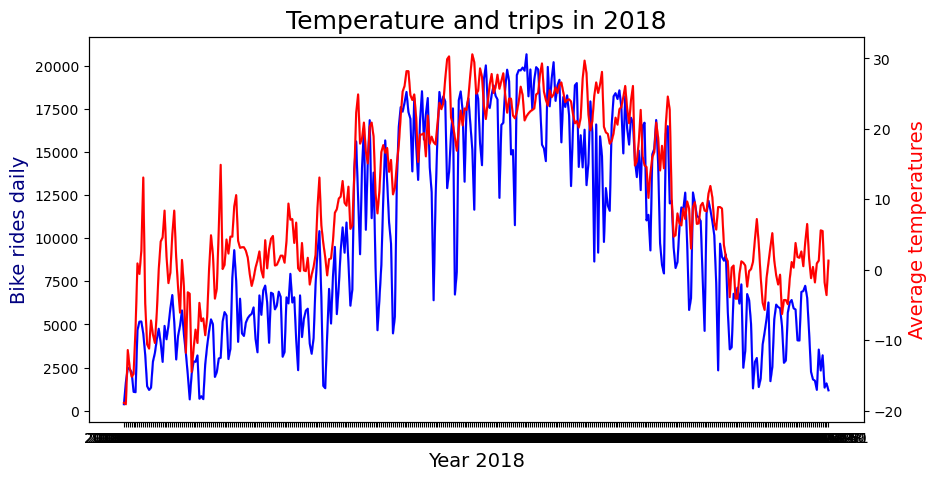

In [36]:
# Plot daily bike rides and average temperature on dual axes for 2018

fig,ax = plt.subplots(figsize=(10, 5)) # Create a new figure and primary plotting axis
sns.lineplot(data = df_temp['bike_rides_daily'], color = "b") # Plot the daily bike rides as a blue line on the chart
ax.set_xlabel("Year 2018", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

ax2 = ax.twinx() # Create a second y-axis that shares the same x-axis as the main plot
sns.lineplot(data = df_temp['avgTemp'], color="r", ax=ax2) # Plot the average temperature as a red line on the secondary y-axis
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14) # Label the secondary y-axis with text styled in red at size 14
plt.title('Temperature and trips in 2018', fontsize = 18) # Add a main title to the chart with font size 18
plt.show() # Display the final chart output on the screen

### Box plots

In [37]:
# Display the data type of each column in the dataframe

df.dtypes

trip_id                       int64
start_time                   object
end_time                     object
bikeid                        int64
tripduration                 object
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
date                 datetime64[ns]
avgTemp                     float64
_merge                       object
birth_year                    int64
birth_year_2         datetime64[ns]
age                           int64
value                         int64
bike_rides_daily              int64
merge_flag                 category
dtype: object

In [38]:
# Show all values from the 'gender' column of the dataframe

df['gender']

0            Male
1            Male
2            Male
3            Male
4            Male
            ...  
3603077    Female
3603078    Female
3603079    Female
3603080      Male
3603081      Male
Name: gender, Length: 3603082, dtype: object

In [39]:
# List all column names in the dataframe

df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'date', 'avgTemp',
       '_merge', 'birth_year', 'birth_year_2', 'age', 'value',
       'bike_rides_daily', 'merge_flag'],
      dtype='object')

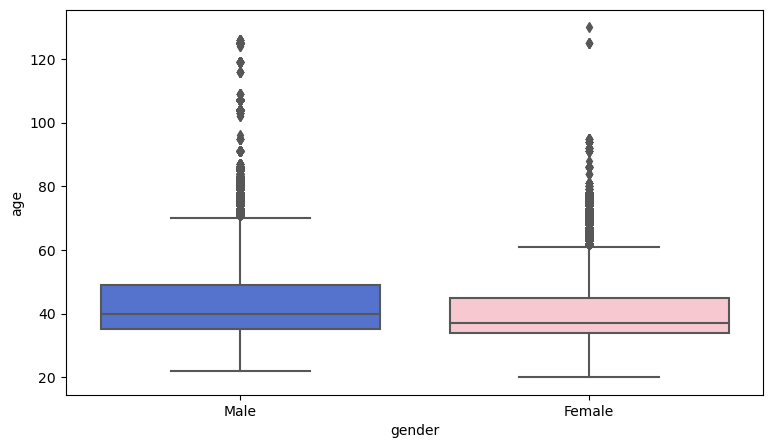

In [40]:
# Create a boxplot comparing age distribution between male and female riders

plt.figure(figsize=(9,5)) # Create a new figure with a width of 9 and height of 5 inches
sns.boxplot(x = 'gender', y = 'age', data = df, palette = {'Male': 'royalblue', 'Female': 'pink'}) # Plot a boxplot of age by gender using custom colors for each category
plt.show() # Display the final chart output on the screen

### Violin plot 

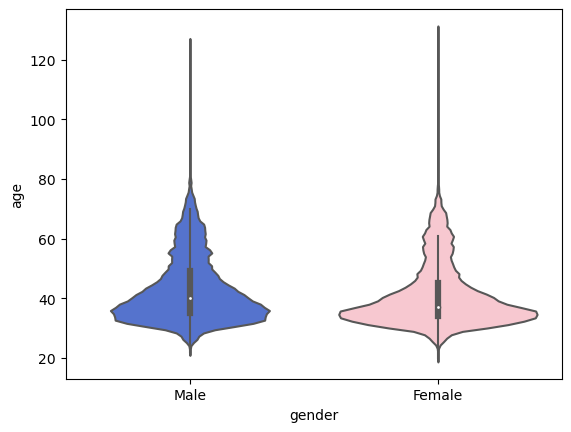

In [41]:
# Create a violin plot to visualize the age distribution for each gender

sns.violinplot(x = 'gender', y = 'age', data = df, palette = {'Male': 'royalblue', 'Female': 'pink'}) # Plot a violin chart of age by gender using custom colors for each category
plt.show() # Display the final chart output on the screen

### Strip plot

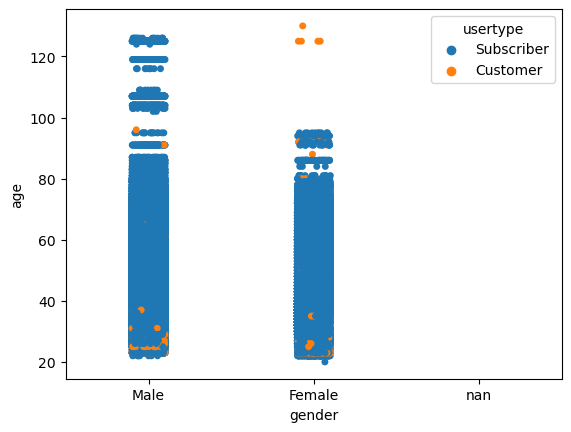

In [42]:
# Plot individual age points by gender and user type using a strip plot

sns.stripplot(x = 'gender', y = 'age', data = df, hue = 'usertype')
plt.show()

In [43]:
# Reset seaborn’s plotting settings back to their original defaults

sns.reset_orig()

### FacetGrids

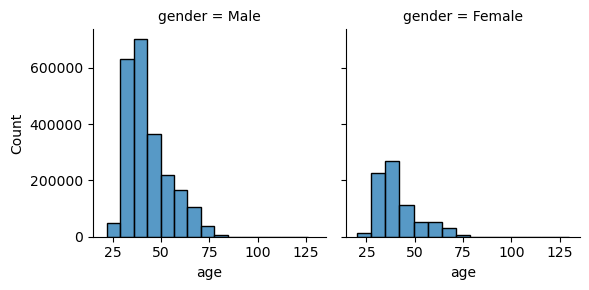

In [45]:
# Generate separate age histograms for each gender using a FacetGrid

grid = sns.FacetGrid(df, col = "gender") # Create a grid of subplots split into separate columns for each gender
grid.map(sns.histplot, "age", bins = 15) # Plot age histograms with 15 bins inside each gender subplot in the grid
plt.show() # Display the final chart output on the screen

### Histogram

In [46]:
# Apply the 'darkgrid' visual style to all upcoming seaborn plots

sns.set_style('darkgrid')

In [47]:
# Enable inline display of matplotlib plots inside the notebook

%matplotlib inline

<Figure size 900x500 with 0 Axes>

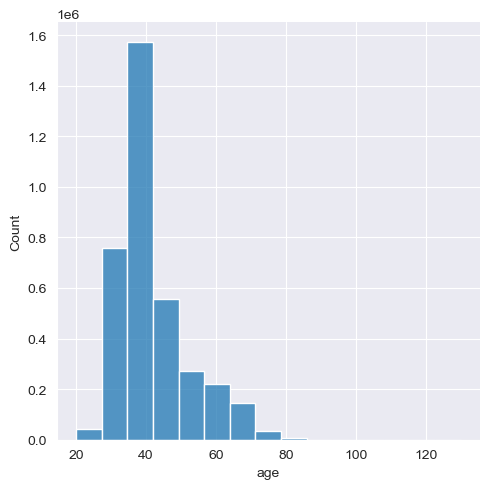

In [48]:
# Plot a histogram of age distribution with 15 bins

plt.figure(figsize=(9,5)) # Create a new figure with a width of 9 and height of 5 inches
sns.displot(df['age'], bins = 15) # Plot a distribution histogram of the age column using 15 bins
plt.show() # Display the final chart output on the screen

In [49]:
# Reset seaborn’s plotting settings back to their original defaults

sns.reset_orig()

<Figure size 900x500 with 0 Axes>

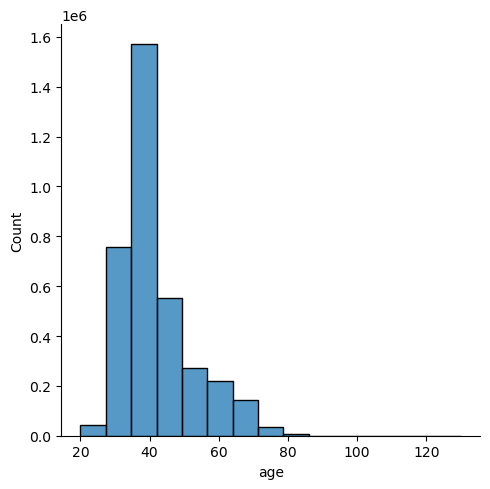

In [50]:
# Plot a histogram of age distribution with 15 bins (After Resetting Plot Settings)

plt.figure(figsize=(9,5)) # Create a new figure with a width of 9 and height of 5 inches
sns.displot(df['age'], bins = 15) # Plot a distribution histogram of the age column using 15 bins
plt.show() # Display the final chart output on the screen

In [51]:
# Apply the 'whitegrid' style to all seaborn plots

sns.set_style('whitegrid')

<Figure size 900x500 with 0 Axes>

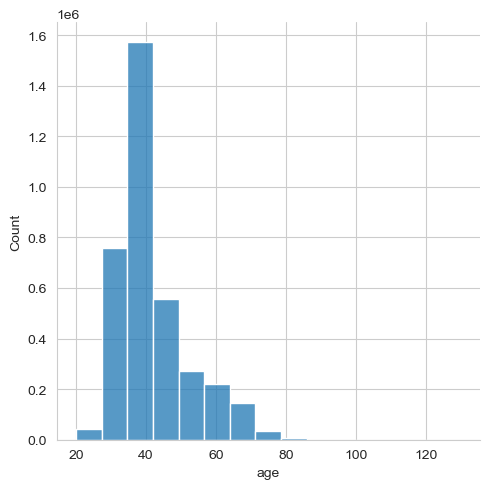

In [53]:
# Plot a histogram of age distribution with 15 bins (After setting Whitegrid Style)

plt.figure(figsize=(9,5)) # Create a new figure with a width of 9 and height of 5 inches
sns.displot(df['age'], bins = 15) # Plot a distribution histogram of the age column using 15 bins
plt.show() # Display the final chart output on the screen

In [55]:
# Switch plot styling to the dark theme

sns.set_style('dark')

<Figure size 900x500 with 0 Axes>

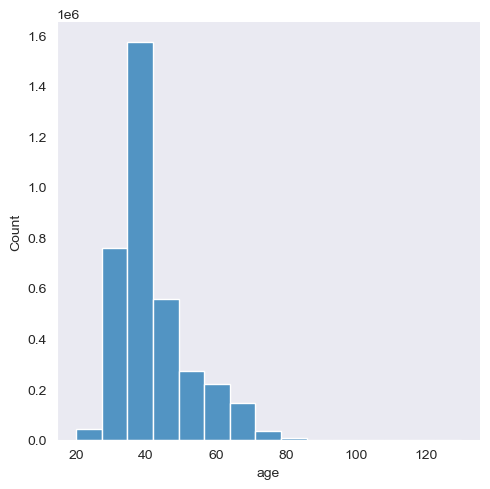

In [56]:
# Plot a histogram of age distribution with 15 bins (After setting Dark Style)

plt.figure(figsize=(9,5)) # Create a new figure with a width of 9 and height of 5 inches
sns.displot(df['age'], bins = 15) # Plot a distribution histogram of the age column using 15 bins
plt.show() # Display the final chart output on the screen

In [57]:
# Switch plot styling to the White theme

sns.set_style('white')

<Figure size 900x500 with 0 Axes>

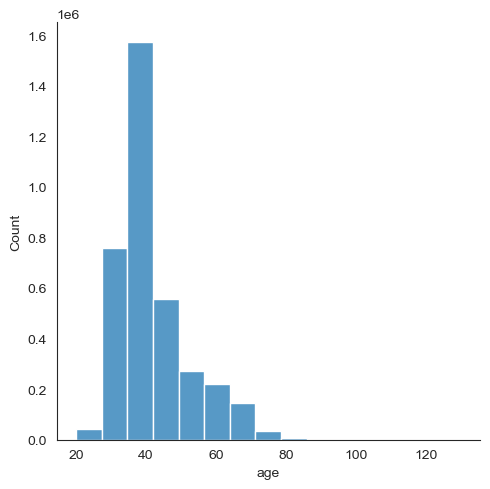

In [58]:
# Plot a histogram of age distribution with 15 bins (After setting White Style)

plt.figure(figsize=(9,5)) # Create a new figure with a width of 9 and height of 5 inches
sns.displot(df['age'], bins = 15) # Plot a distribution histogram of the age column using 15 bins
plt.show() # Display the final chart output on the screen

In [59]:
# Switch plot styling to the Ticks theme

sns.set_style('ticks')

<Figure size 900x500 with 0 Axes>

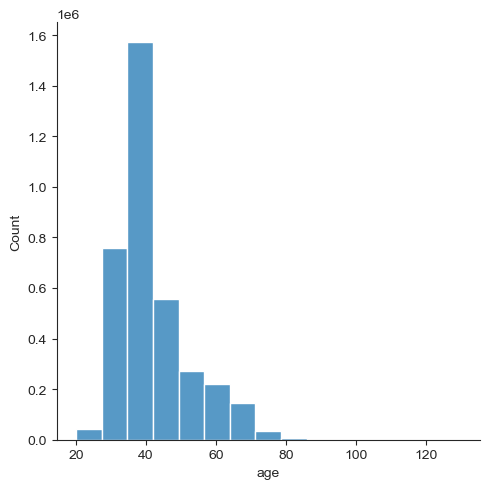

In [60]:
# Plot a histogram of age distribution with 15 bins (After setting Ticks Style)

plt.figure(figsize=(9,5)) # Create a new figure with a width of 9 and height of 5 inches
sns.displot(df['age'], bins = 15) # Plot a distribution histogram of the age column using 15 bins
plt.show() # Display the final chart output on the screen

In [62]:
# Apply seaborn’s default theme settings to all upcoming plots

sns.set_theme()

<Figure size 900x500 with 0 Axes>

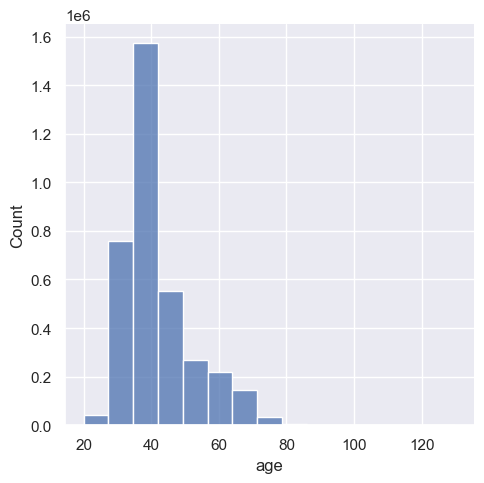

In [63]:
# Plot a histogram of age distribution with 15 bins (After setting Seaborn Default Style)

plt.figure(figsize=(9,5)) # Create a new figure with a width of 9 and height of 5 inches
sns.displot(df['age'], bins = 15) # Plot a distribution histogram of the age column using 15 bins
plt.show() # Display the final chart output on the screen

In [64]:
# Apply a white grid style and reversed Blues color palette to all upcoming plots

sns.set_theme(style="whitegrid", palette="Blues_r")

In [65]:
# Display the first five values from the 'tripduration' column

df['tripduration'].head()

0      323.0
1      377.0
2    2,904.0
3      747.0
4      183.0
Name: tripduration, dtype: object

### Palettes

In [66]:
# Apply the dark style and the reversed PuRd color palette to upcoming seaborn plots

sns.set_style("dark") # Apply the dark visual style to all upcoming plots
sns.set_palette('PuRd_r') # Set the default color palette to the reversed PuRd palette for upcoming plots

<Figure size 900x500 with 0 Axes>

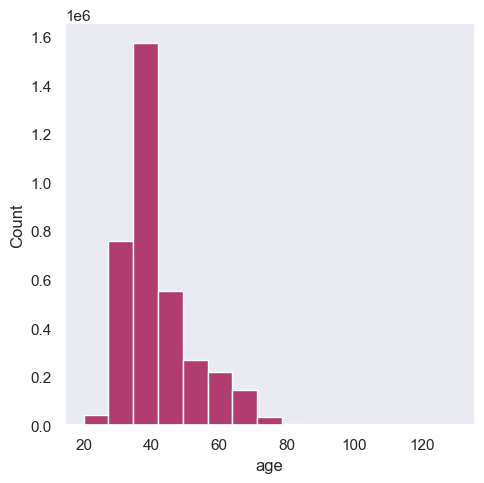

In [67]:
# Plot a histogram of age distribution with 15 bins (After setting New Color Palette)

plt.figure(figsize=(9,5)) # Create a new figure with a width of 9 and height of 5 inches
sns.displot(df['age'], bins = 15) # Plot a distribution histogram of the age column using 15 bins
plt.show() # Display the final chart output on the screen

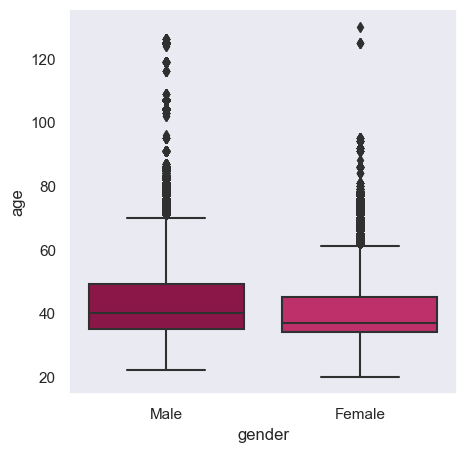

In [68]:
# Create a boxplot of age by gender using the current theme and palette

plt.figure(figsize=(5,5)) # Create a new figure with a width and height of 5 inches
sns.boxplot(x = 'gender', y = 'age', data = df) # Plot a boxplot showing the age distribution for each gender
plt.show() # Display the final chart output on the screen

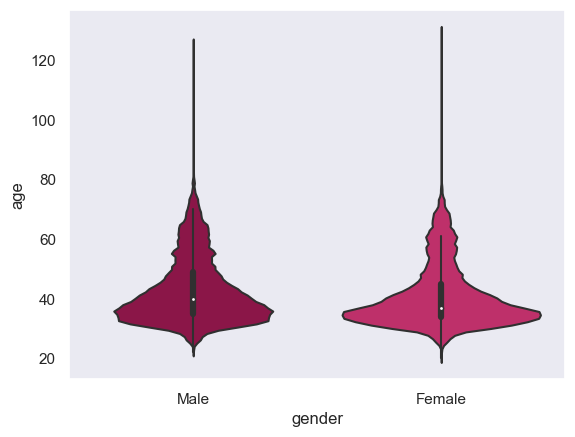

In [70]:
# Create a violin plot showing the age distribution for each gender

sns.violinplot(x = 'gender', y = 'age', data = df) # Plot a violin chart showing the age distribution for each gender
plt.show() # Display the final chart output on the screen

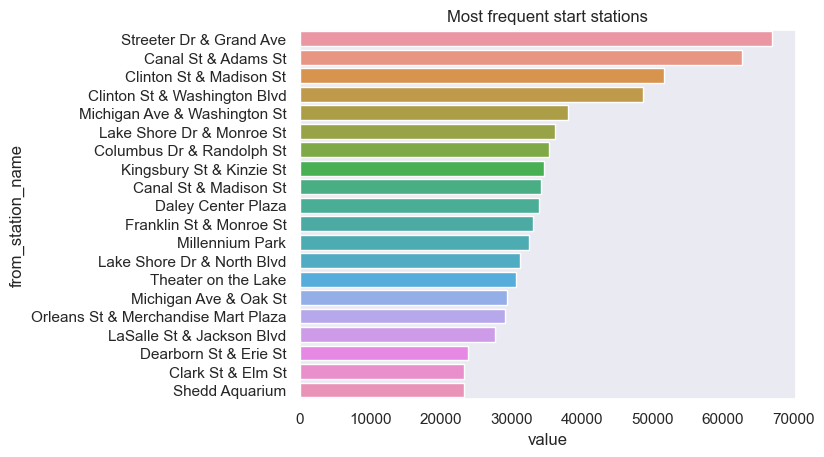

In [72]:
# Plot the top 20 start stations using the PuRd_r color palette (It will look default because more than 20 shades are present)

sns.set_palette('PuRd_r') # Set the default color palette to the reversed PuRd palette for upcoming plots
sns.barplot(data = top20, x = 'value', y = 'from_station_name') # Create a barplot showing trip counts for the top 20 start stations
plt.title("Most frequent start stations") # Add a title to the chart indicating it shows the most frequent start stations
plt.show() # Display the final chart output on the screen

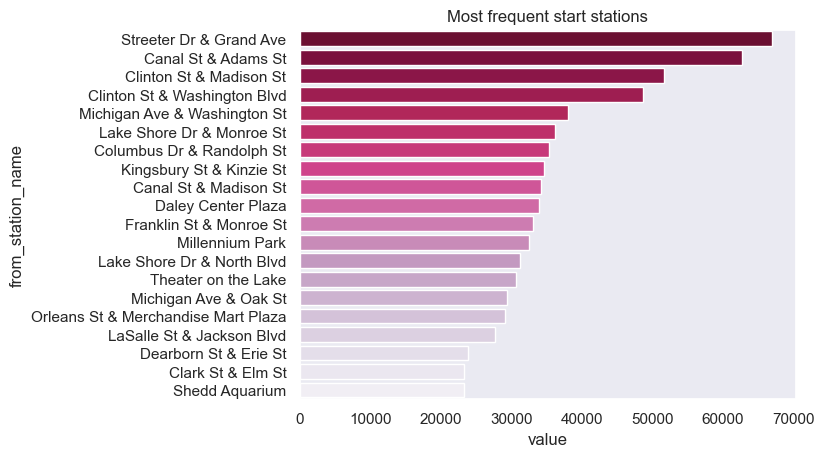

In [73]:
# Apply a 20-color PuRd_r palette and plot the top 20 start stations_ (Now it will affect because the shades are selected clearly)

sns.set_palette('PuRd_r', n_colors = 20) # Set a PuRd_r color palette with 20 distinct colors
sns.barplot(data = top20, x = 'value', y = 'from_station_name') # Create a barplot showing trip counts for the top 20 start stations
plt.title("Most frequent start stations") # Add a title to the chart indicating it shows the most frequent start stations
plt.show() # Display the final chart output on the screen

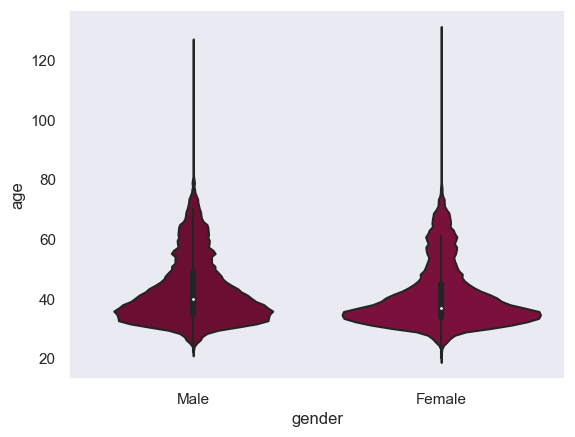

In [74]:
# Visualize the age distribution for each gender using a violin plot

sns.violinplot(x = 'gender', y = 'age', data = df) # Plot a violin plot to show how age varies across genders
plt.show() # Display the final chart output on the screen

In [89]:
# Create a barplot of the top 20 start stations using a 20-color PuRd_r palette

plt.figure(figsize = (10, 5)) # Create a new figure with a width of 10 inches and height of 5 inches
with sns.color_palette('PuRd_r', n_colors = 20): # Use a temporary reversed PuRd color palette with 20 colors for the plot inside this block
    sns.barplot(data = top20, x = 'value', y = 'from_station_name').set_title("Most frequent start stations")
    # ↑ Plot a bar chart of the top start stations and set the title within the color palette context

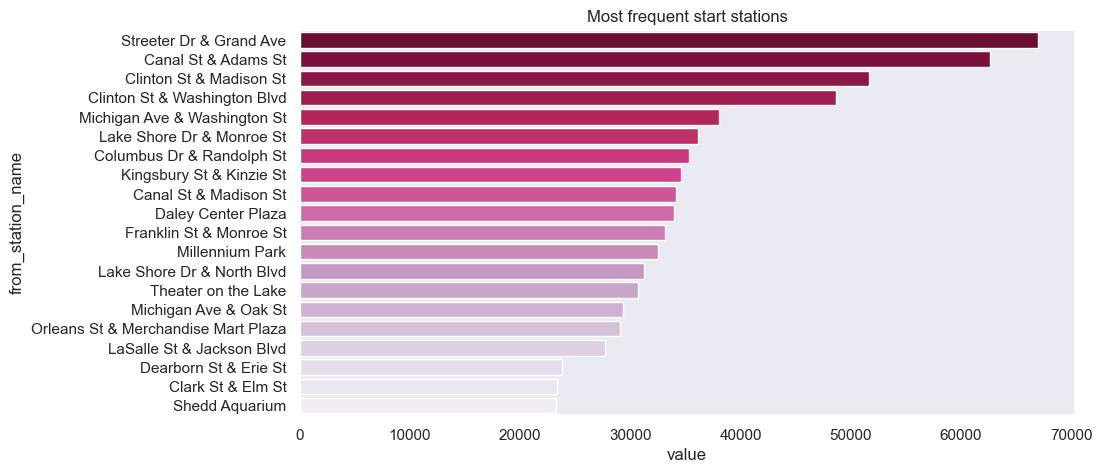

In [81]:
# Display the final chart output on the screen

plt.show()

### Themes

In [82]:
# Remove commas from tripduration values and convert the column to float format

df['tripduration'] = df['tripduration'].str.replace(',',"") # Remove commas from tripduration values
df['tripduration'] = df['tripduration'].astype('float64') # Convert the tripduration column to float values

In [83]:
# Generate summary statistics for tripduration and format all values as plain floats

df['tripduration'].describe().apply(lambda x: format(x, 'f'))

count     3603082.000000
mean         1413.168251
std         35947.229026
min            61.000000
25%           395.000000
50%           673.000000
75%          1210.000000
max      14336400.000000
Name: tripduration, dtype: object

In [84]:
# Create a filtered dataframe keeping only trips with duration less than 5000 seconds

df_1 = df[df['tripduration'] < 5000]

In [85]:
# Print the original dataframe shape and the filtered dataframe shape for comparison

print(df.shape) # Print the Original Dataframe
print(df_1.shape) # Print the Filtered Dataframe

(3603082, 21)
(3519302, 21)


In [87]:
# Apply a white theme and bright color palette to all upcoming seaborn plots

sns.set_theme(style = "white", palette = "bright")

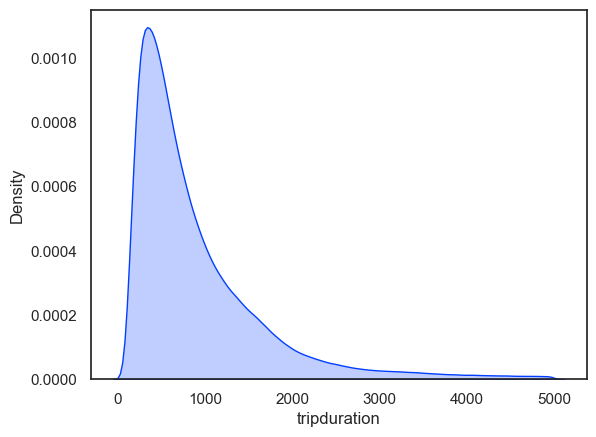

In [88]:
# Plot a filled kernel density estimate of the tripduration distribution for the filtered data

sns.kdeplot(df_1['tripduration'], fill = True)
plt.show() # Display the final chart output on the screen

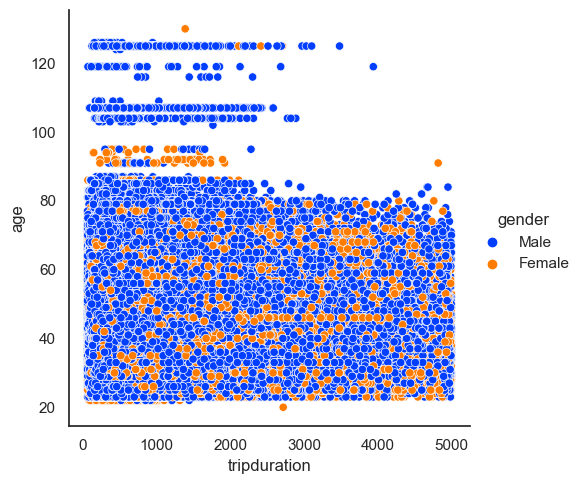

In [91]:
# Plot a scatter style relationship between trip duration and age, colored by genderCreate a scatterplot of trip duration vs age, colored by gender

sns.relplot(data = df_1, x = 'tripduration', y = 'age', hue = 'gender') # Plot trip duration against age with points colored by gender
plt.show() # Display the final chart output on the screen

In [92]:
# Export the dataframe to CSV file

df.to_csv('chicago_data.csv')